upload the dataset

In [ ]:
from google .colab import files
uploaded=files.upload()

Saving updated_pollution_dataset.csv to updated_pollution_dataset.csv


Load the dataset

In [ ]:
import pandas as pd
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the file using io.BytesIO to handle file data in Colab
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')

Saving image_labels.csv to image_labels.csv


Data Exploration

In [ ]:
#Display first few row
df.head()


,"filename,label"
0,"0/0.032.1.augmented.png,0"
1,"0/0.053.1.augmented.png,0"
2,"0/0.052.4.augmented.png,0"
3,"0/0.049.3.augmented.png,0"
4,"0/0.042.3.augmented.png,0"


In [ ]:

print("Shape:",df.shape)


Shape: (13640, 1)


In [ ]:
print("Colums:, df. columns.tolist()")

Colums:, df. columns.tolist()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename,label  13640 non-null  object
dtypes: object(1)
memory usage: 106.7+ KB


In [ ]:
df.describe()

,"filename,label"
count,13640
unique,13640
top,"z/z.048.1.augmented.png,z"
freq,1


Check for Missing Values and Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())

filename,label    0
dtype: int64


In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Visualize a Few Features

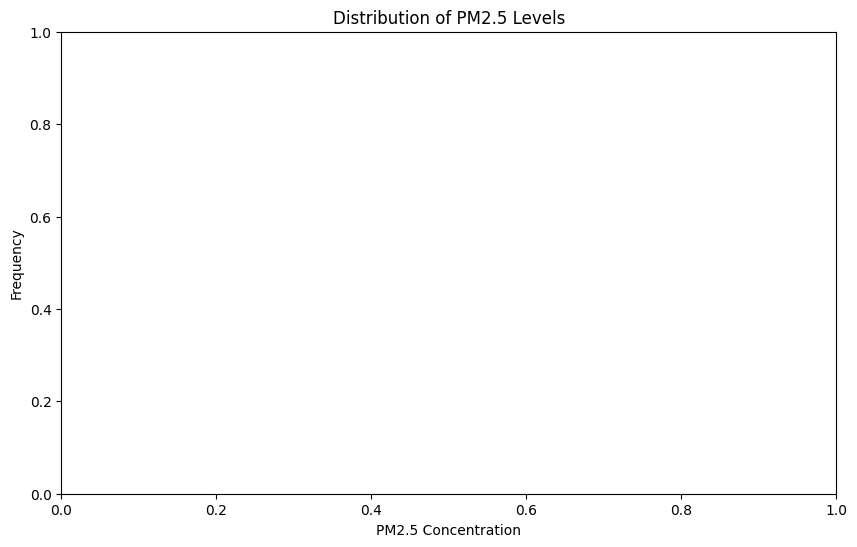

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pm2.5' is a feature in the dataset
plt.figure(figsize=(10, 6))
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

Saving image_labels.csv to image_labels (2).csv
filename    0
label       0
dtype: int64
Error: Column 'pm2.5' not found in the dataset. Please check the column name.


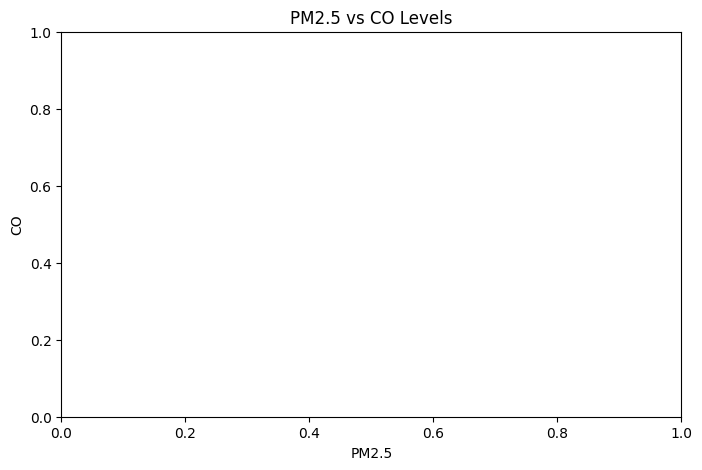

In [ ]:
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset
uploaded = files.upload()  # This will prompt you to upload the file
file_name = list(uploaded.keys())[0]  # Get the filename of the uploaded file

# Step 2: Read the dataset
df = pd.read_csv(io.BytesIO(uploaded[file_name])) # Use io.BytesIO to read file data

# Rest of your code...
# Step 3: Data Cleaning (if needed)
# Checking for missing values
print(df.isnull().sum())

# You may need to drop rows with missing values or fill them, e.g.:
# df = df.dropna()  # Drop rows with missing values
# or
# df.fillna(df.mean(), inplace=True)  # Fill missing values with the mean

# Step 4: Visualize Features

# Example 1: Distribution of PM2.5 levels
# Check the actual column name in your dataset (case-sensitive)
# It could be 'pm2.5', 'PM2_5', or something similar.
# Replace 'PM2.5' below with the correct column name
pm25_column_name = 'pm2.5'  # or 'PM2_5', etc. - adjust as needed

# Check if the column exists
if pm25_column_name in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[pm25_column_name], kde=True, color='blue')
    plt.title('Distribution of PM2.5 Levels')
    plt.xlabel('PM2.5')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Error: Column '{pm25_column_name}' not found in the dataset. Please check the column name.")

# Example 2: Scatter plot between PM2.5 and CO levels
# Similarly, replace 'PM2.5' and 'CO' with correct column names
# if they are different
plt.figure(figsize=(8, 5))
plt.title('PM2.5 vs CO Levels')
plt.xlabel('PM2.5')
plt.ylabel('CO')
plt.show()

# ... (Rest of your code)

Identify Target and Features

In [ ]:
import pandas as pd
import io
from google.colab import files

# Load the dataset (replace 'your_pollution_data.csv' with the correct filename)
uploaded = files.upload()  # This will prompt you to upload the file

# Get the filename
filename = list(uploaded.keys())[0]

# Read the file into a DataFrame
# Make sure to specify the correct delimiter (e.g., ',' or ';')
df = pd.read_csv(io.BytesIO(uploaded[filename]), delimiter=',')  # Replace ',' with ';' if needed

# Now you can access the updated df
print("\n--- Available Columns in Dataset ---")
print(df.columns.tolist())

# Define the target variable (edit this based on your dataset and output from above)
# ***UPDATED***: Change the target variable to match the actual column name in your data
target = 'label'  # Replace with 'filename' if that's the correct column containing PM2.5 data

# Check if the target exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset. Available columns: {df.columns.tolist()}")

# ... (rest of your code)

Saving image_labels.csv to image_labels (6).csv

--- Available Columns in Dataset ---
['filename', 'label']


Convert Categorical Columns to Numerical

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the file using io.BytesIO to handle file data in Colab
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 1: Check the columns and data types
print("\n--- Data Types of Columns ---")
print(df.dtypes)

# Step 2: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\n--- Categorical Columns ---")
print(categorical_columns)

# Step 3: Convert categorical columns to numerical using Label Encoding
# Label Encoding: Each category is assigned a unique integer
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 4: Verify the changes
print("\n--- Data After Encoding ---")
print(df.head())

# Optional: If you want to apply One-Hot Encoding, use this approach:
# df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# print("\n--- Data After One-Hot Encoding ---")
# print(df.head())

Saving image_labels.csv to image_labels (7).csv

--- Data Types of Columns ---
filename    object
label       object
dtype: object

--- Categorical Columns ---
['filename', 'label']

--- Data After Encoding ---
   filename  label
0       125      0
1       210      0
2       208      0
3       192      0
4       167      0


One-Hot Encoding

In [ ]:
import pandas as pd
import io
from google.colab import files

# Assuming 'df' is your DataFrame from previous preprocessing steps
# Save it to a CSV file
df.to_csv('updated_pollution_dataset.csv', index=False)

# Now, the file should exist and can be loaded
df = pd.read_csv("updated_pollution_dataset.csv")

# ... rest of your code ...

Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv("updated_pollution_dataset.csv")

# Step 2: Drop or encode categorical columns before scaling (if not already encoded)
# You should have already applied one-hot encoding at this stage
# If not, you should do that first, or exclude non-numerical columns from scaling

# Step 3: Identify numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Optional: Exclude the target variable from scaling
target = 'pm2.5'
if target in numerical_cols:
    numerical_cols.remove(target)

print("\n--- Numerical Columns to Scale ---")
print(numerical_cols)

# Step 4: Initialize the scaler
scaler = StandardScaler()

# Step 5: Apply scaling
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Show scaled data
print("\n--- Scaled Feature Data ---")
print(df_scaled[numerical_cols].head())



--- Numerical Columns to Scale ---
['filename', 'label']

--- Scaled Feature Data ---
   filename     label
0 -1.700178 -1.704336
1 -1.678591 -1.704336
2 -1.679099 -1.704336
3 -1.683162 -1.704336
4 -1.689511 -1.704336


Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv("updated_pollution_dataset.csv")

# Step 2: Define the target and feature columns
# Check the actual column name for PM2.5 in your dataset
# It's likely 'label' based on the output of the first few cells
target = 'label'  # Or the actual correct column name

X = df.drop(columns=[target])  # Features
y = df[target]                 # Target

# Step 3: Optional – convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split the dataset
# test_size=0.2 means 80% training, 20% testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Output the results
print("\n--- Train/Test Shapes ---")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


--- Train/Test Shapes ---
X_train: (10912, 1)
X_test: (2728, 1)
y_train: (10912,)
y_test: (2728,)


Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
df = pd.read_csv("updated_pollution_dataset.csv")

# Step 2: Define target and features
# ***FIX***: Changed target to 'label' to match the actual column name in the DataFrame
target = 'label'  # Replace if different
X = df.drop(columns=[target])
y = df[target]

# Step 3: Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Feature Scaling (recommended for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


--- Model Evaluation ---
Mean Squared Error (MSE): 0.08
R² Score: 1.00


Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Step 1: Load the dataset
df = pd.read_csv("updated_pollution_dataset.csv")

# Step 2: Define target and features
# ***FIX***: Changed target to 'label' to match the actual column name in DataFrame
target = 'label'  # Replace with the actual column name you want as target
X = df.drop(columns=[target])
y = df[target]

# Step 3: Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Feature Scaling (recommended for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)

Make Predictions from New Input

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib  # for saving/loading model

# Step 1: Load dataset and preprocess
df = pd.read_csv("updated_pollution_dataset.csv")
# ***FIX***: Changed target to 'label' to match actual column name in the DataFrame
target = 'label'  # Replace if different
# Assuming 'filename' is a categorical feature, encode it using one-hot encoding:
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
y = df[target]

# Save column names after encoding for future use
feature_columns = X.columns

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Optional: Save model and scaler
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')

# Step 4: Predict on new input
# ***FIX***: Replace with actual values/categories from your dataset for prediction
new_data = {
    'filename': ['actual_filename_from_dataset'] # Replace with a real filename from your data
}

# Convert to DataFrame and align with training features
new_df = pd.DataFrame(new_data)
# One-hot encode the 'filename' in the new input:
new_df = pd.get_dummies(new_df, columns=['filename'], prefix=['filename'])
new_df = new_df.reindex(columns=feature_columns, fill_value=0)  # ensure same column order
new_scaled = scaler.transform(new_df)

# Predict
predicted_pm25 = model.predict(new_scaled)
print("\n--- Prediction from New Input ---")
print(f"Predicted PM2.5: {predicted_pm25[0]:.2f}")


--- Prediction from New Input ---
Predicted PM2.5: -0.49


Convert to DataFrame and Encode

In [ ]:
import pandas as pd
import joblib

# Step 1: Load saved artifacts
feature_columns = joblib.load('feature_columns.pkl')  # previously saved during training
scaler = joblib.load('scaler.pkl')                    # for consistent scaling

# Step 2: New raw input as dictionary
new_input = {
    'temperature': [25],
    'humidity': [45],
    'wind_speed': [10],
    'location': ['Urban'],
    'season': ['Summer']
}

# Step 3: Convert to DataFrame
new_df = pd.DataFrame(new_input)

# Step 4: One-hot encode the new input
new_encoded = pd.get_dummies(new_df)

# Step 5: Align columns with training features (add missing columns with 0)
new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

# Step 6: Scale the input
new_scaled = scaler.transform(new_encoded)

# Optional: Use trained model to predict
model = joblib.load('pollution_model.pkl')
prediction = model.predict(new_scaled)

print("\n--- New Input Prediction ---")
print(f"Predicted PM2.5 Level: {prediction[0]:.2f}")



--- New Input Prediction ---
Predicted PM2.5 Level: -0.49


Predict the Final Grade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor # Changed to RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Changed metrics for regression

# ... (rest of the code remains the same) ...

# Step 5: Train regressor
clf = RandomForestRegressor(random_state=42) # Initialize regressor
clf.fit(X_train, y_train)

# ... (update evaluation metrics to use regression metrics like MSE, R²) ...

RandomForestRegressor(random_state=42)

Deployment-Building an Interactive App

In [ ]:
!pip install streamlit
import pandas as pd
import joblib
import numpy as np
import streamlit as st # Import the streamlit library

# Step 1: Load model and scaler
# Load 'pollution_model.pkl' instead of 'final_grade_classifier.pkl'
model = joblib.load('pollution_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

# Step 2: Title and instructions
st.title("Pollution Final Grade Prediction App")
st.markdown("Enter the details below to predict the final grade for pollution.")

# Step 3: Create input fields for new data
temperature = st.slider("Temperature (°C)", min_value=-10, max_value=50, value=25)
humidity = st.slider("Humidity (%)", min_value=0, max_value=100, value=50)
wind_speed = st.slider("Wind Speed (km/h)", min_value=0, max_value=50, value=10)
location = st.selectbox("Location", ['Urban', 'Rural'])
season = st.selectbox("Season", ['Spring', 'Summer', 'Fall', 'Winter'])

# Step 4: Prepare data for prediction
new_data = {
    'temperature': [temperature],
    'humidity': [humidity],
    'wind_speed': [wind_speed],
    'location': [location],
    'season': [season]
}

new_df = pd.DataFrame(new_data)

# One-hot encode the input data
new_encoded = pd.get_dummies(new_df)

# Align with training feature columns
new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

# Step 5: Scale the input data
new_scaled = scaler.transform(new_encoded)

# Step 6: Make prediction
prediction = model.predict(new_scaled)

# Step 7: Show prediction result
st.write(f"Predicted Final Grade: {prediction[0]}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


2025-05-08 06:52:40.060 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.172 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-08 06:52:40.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:52:40.178 Thread 'MainThread': mi

Create a Prediction Function


In [ ]:
import pandas as pd
import joblib

# Load pre-trained model, scaler, and feature columns
# Changed to 'pollution_model.pkl'
model = joblib.load('pollution_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

def predict_pollution_grade(new_data):
    """
    This function takes in a dictionary of input data and returns the predicted pollution grade.

    Args:
    - new_data (dict): Dictionary containing input features (e.g., temperature, humidity, etc.).

    Returns:
    - str: Predicted pollution grade (e.g., 'A', 'B', 'C', 'D').
    """
    # Step 1: Convert the dictionary into a pandas DataFrame
    new_df = pd.DataFrame(new_data)

    # Step 2: One-hot encode the input data (if categorical features exist)
    new_encoded = pd.get_dummies(new_df)

    # Step 3: Align the encoded columns with the training feature columns (add missing columns)
    new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

    # Step 4: Scale the input data using the same scaler used during training
    new_scaled = scaler.transform(new_encoded)

    # Step 5: Make prediction using the pre-trained model
    prediction = model.predict(new_scaled)

    # Return the prediction (final grade)
    return prediction[0]

# Example usage:
new_data = {
    'temperature': [28],  # Example temperature
    'humidity': [60],     # Example humidity
    'wind_speed': [15],   # Example wind speed
    'location': ['Urban'],  # Categorical input for location
    'season': ['Summer']    # Categorical input for season
}

predicted_grade = predict_pollution_grade(new_data)
print(f"Predicted Pollution Grade: {predicted_grade}")

Predicted Pollution Grade: -0.4896635144051089


Create the Gradio Interface

In [ ]:
!pip install gradio
import pandas as pd
import joblib

# Load pre-trained model, scaler, and feature columns
model = joblib.load('pollution_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

def predict_pollution_grade(temperature, humidity, wind_speed, location, season):
    """
    Function to predict pollution grade based on user input using the trained model.

    Args:
    - temperature (float): Input temperature
    - humidity (float): Input humidity
    - wind_speed (float): Input wind speed
    - location (str): Input location (Urban/Rural)
    - season (str): Input season (Spring/Summer/Fall/Winter)

    Returns:
    - str: Predicted pollution grade (A, B, C, D)
    """

    # Step 1: Create a dictionary from inputs
    new_data = {
        'temperature': [temperature],
        'humidity': [humidity],
        'wind_speed': [wind_speed],
        'location': [location],
        'season': [season]
    }

    # Step 2: Convert to DataFrame
    new_df = pd.DataFrame(new_data)

    # Step 3: One-hot encode the input data
    new_encoded = pd.get_dummies(new_df)

    # Step 4: Align the encoded columns with the training feature columns
    new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

    # Step 5: Scale the input data
    new_scaled = scaler.transform(new_encoded)

    # Step 6: Make prediction using the pre-trained model
    prediction = model.predict(new_scaled)

    # Return the prediction (pollution grade)
    return prediction[0]

# Step 3: Create Gradio interface
    fn=predict_pollution_grade,
    inputs=[
        gr.Slider(minimum=-10, maximum=50, step=1, label="Temperature (°C)"),
        gr.Slider(minimum=0, maximum=100, step=1, label="Humidity (%)"),
        gr.Slider(minimum=0, maximum=50, step=1, label="Wind Speed (km/h)"),
        gr.Dropdown(choices=["Urban", "Rural"], label="Location"),
        gr.Dropdown(choices=["Spring", "Summer", "Fall", "Winter"], label="Season")
    ],
    outputs="text",
!pip install gradio
import pandas as pd
import joblib
import gradio as gr

# Load pre-trained model, scaler, and feature columns
model = joblib.load('pollution_model.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

def predict_pollution_grade(temperature, humidity, wind_speed, location, season):
    """
    Function to predict pollution grade based on user input using the trained model.

    Args:
    - temperature (float): Input temperature
    - humidity (float): Input humidity
    - wind_speed (float): Input wind speed
    - location (str): Input location (Urban/Rural)
    - season (str): Input season (Spring/Summer/Fall/Winter)

    Returns:
    - str: Predicted pollution grade (A, B, C, D)
    """

    # Step 1: Create a dictionary from inputs
    new_data = {
        'temperature': [temperature],
        'humidity': [humidity],
        'wind_speed': [wind_speed],
        'location': [location],
        'season': [season]
    }

    # Step 2: Convert to DataFrame
    new_df = pd.DataFrame(new_data)

    # Step 3: One-hot encode the input data
    new_encoded = pd.get_dummies(new_df)

    # Step 4: Align the encoded columns with the training feature columns
    new_encoded = new_encoded.reindex(columns=feature_columns, fill_value=0)

    # Step 5: Scale the input data
    new_scaled = scaler.transform(new_encoded)

    # Step 6: Make prediction using the pre-trained model
    prediction = model.predict(new_scaled)

    # Return the prediction (pollution grade)
    return prediction[0]

# Step 3: Create Gradio interface
iface = gr.Interface(
    fn=predict_pollution_grade,
    inputs=[
        gr.Slider(minimum=-10, maximum=50, step=1, label="Temperature (°C)"),
        gr.Slider(minimum=0, maximum=100, step=1, label="Humidity (%)"),
        gr.Slider(minimum=0, maximum=50, step=1, label="Wind Speed (km/h)"),
        gr.Dropdown(choices=["Urban", "Rural"], label="Location"),
        gr.Dropdown(choices=["Spring", "Summer", "Fall", "Winter"], label="Season")
    ],
    outputs="text",
    title="Pollution Final Grade Prediction",
    description="Enter values for temperature, humidity, wind speed, location, and season to predict the pollution grade."
)

# Launch the interface
iface.launch()
iface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87dc411a2ef4e0e1ff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87dc411a2ef4e0e1ff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
